In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', rc={'figure.figsize':(8,5)})

In [9]:
import pandas as pd
df=pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:

# Preview
display(df.head())
print("Shape:", df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape: (891, 12)


In [11]:
# Info and basic stats
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
# 1. Missing values count
print("Missing before cleaning:\n", df.isnull().sum())

# 2. Fill Age with median (numeric imputation)
df['Age'] = df['Age'].fillna(df['Age'].median())

# 3. Drop rows where Embarked is missing (categorical essential)
df.dropna(subset=['Embarked'], inplace=True)

# 4. Drop Cabin if too many missing values
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# 5. (Optional) Simplify some columns, e.g., extract title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

# Recheck
print("Missing after cleaning:\n", df.isnull().sum())

Missing before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


In [13]:
# Survival rate overall
survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

# Grouped stats
print("Survival by Pclass:\n", df.groupby('Pclass')['Survived'].mean())
print("Survival by Sex:\n", df.groupby('Sex')['Survived'].mean())
print("Survival by Embarked:\n", df.groupby('Embarked')['Survived'].mean())

Overall survival rate: 38.25%
Survival by Pclass:
 Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survival by Sex:
 Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64
Survival by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


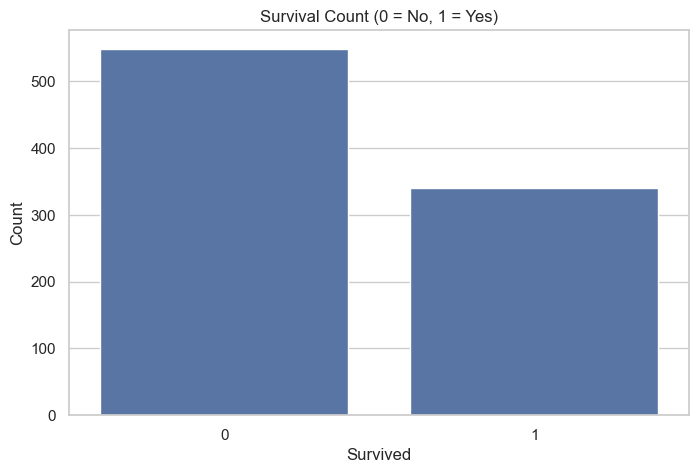

In [14]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

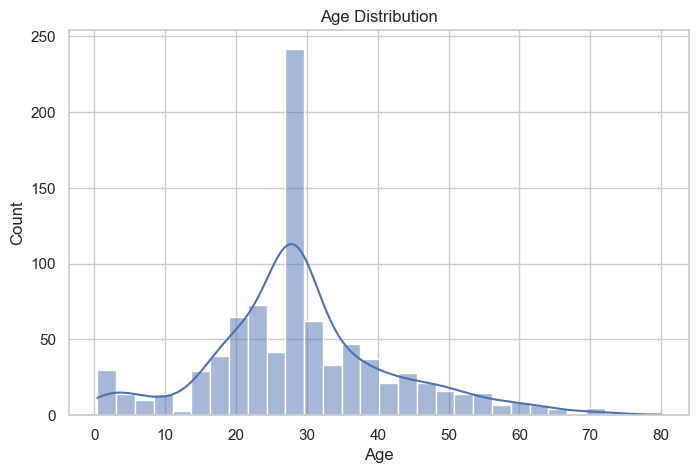

In [15]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

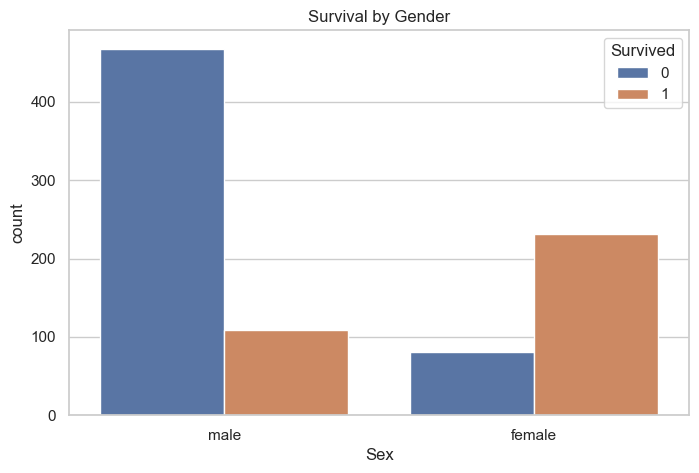

In [16]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

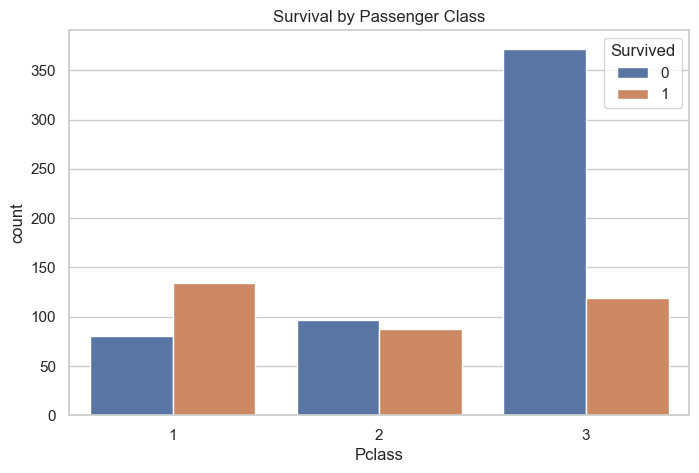

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

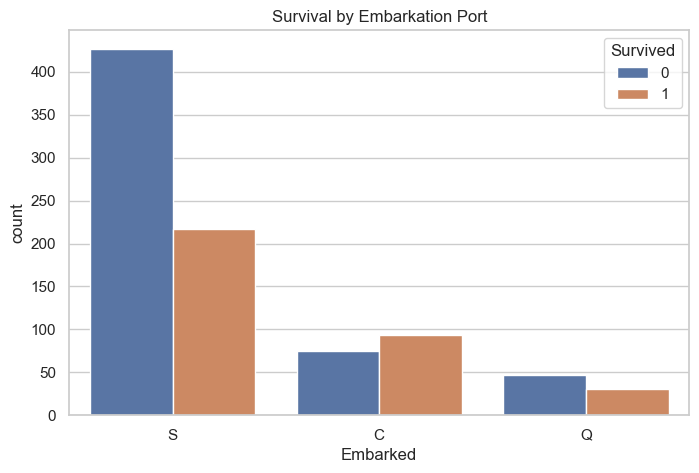

In [19]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()

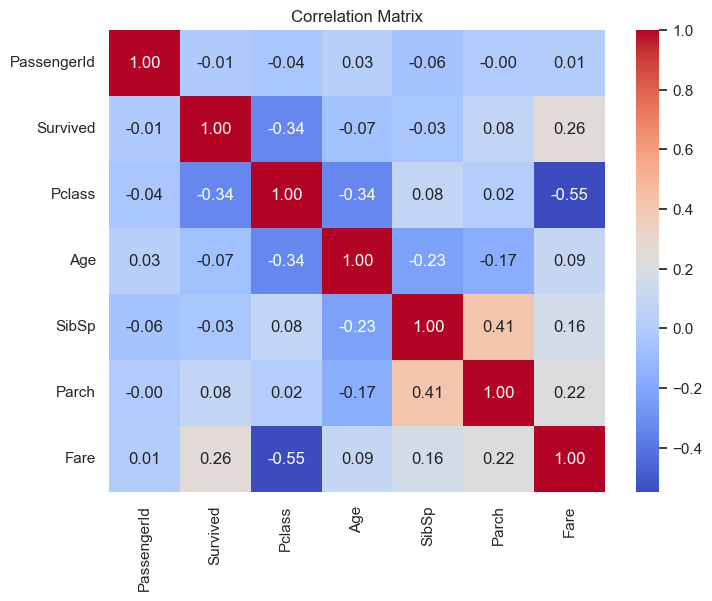

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

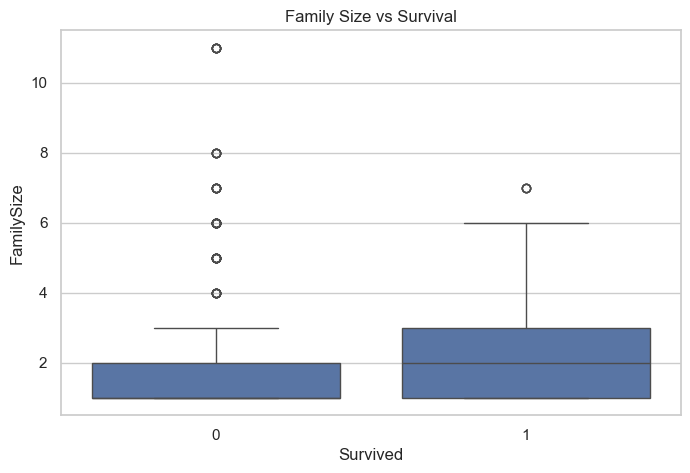

In [21]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.boxplot(x='Survived', y='FamilySize', data=df)
plt.title('Family Size vs Survival')
plt.show()

In [22]:
df.to_csv("cleaned_titanic_full_eda.csv", index=False)

In [ ]:
 """Key Insights from Titanic EDA (Exploratory Data Analysis)"""
 1.Gender and Survival

-->Females had a much higher chance of survival than males.

-->This was likely due to the “women and children first” rescue approach during the evacuation.

-->Bar charts clearly show this gender gap in survival rates.

2. Passenger Class (Pclass)

-->1st class passengers had the highest survival rate.

-->Survival rates decreased for 2nd class, and were lowest for 3rd class.

-->This suggests that wealth, social status, and cabin location played a big role in survival.

3. Age and Survival

-->Children under 10 years had better survival chances than other age groups.

-->Older passengers had lower survival rates, possibly due to limited mobility during the emergency.

-->Age distribution charts and boxplots support this observation.

4. Embarkation Port (Embarked)

-->Passengers who boarded at Cherbourg (C) had the highest survival rate.

-->This may be because more 1st class passengers boarded from Cherbourg.

-->Those who boarded from Southampton (S) or Queenstown (Q) had lower survival rates.

5.Fare and Survival

-->People who paid higher fares were more likely to survive.

-->Higher fare often means 1st class, which had better access to lifeboats.

-->This shows a positive relationship between fare and survival.

6. Correlation Heatmap Insights

-->Pclass is negatively correlated with survival — meaning lower-class passengers had lower chances.

-->Fare is positively correlated — higher fare = higher survival.

-->Other features like age, siblings/spouses, and parents/children aboard showed weaker or mixed correlations.

